In [20]:
#!pip install keras
#import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
from matplotlib import cm
from scipy.linalg import pinv
import matplotlib.pyplot as plt
import random

In [10]:
def activation_function(x):
    return np.tanh(x)

def loss(y, pred):
    return 0.5 * np.mean((y - pred) ** 2)

class ELM:
    def __init__(self, input_shape, num_hidden_neurons, output_shape):
        self.input_shape = input_shape
        self.num_hidden_neurons = num_hidden_neurons
        self.output_shape = output_shape
    
    #initialize H, W, b, and beta
    #first initialize W and b
        self.w = np.random.uniform(-1, 1, size = (self.input_shape, self.num_hidden_neurons))
        self.b = np.random.uniform(-1, 1, size = (self.num_hidden_neurons,))
        self.beta = np.random.uniform(-1, 1, size = (self.num_hidden_neurons, self.output_shape))

    
    #make fit function
    def fit(self, the_input, the_target):
        self.H = activation_function(the_input @ self.w + self.b)
        print(self.H.shape)
        self.beta = pinv(self.H) @ the_target
        #print('Done')
    
    #make prediction call
    def __call__(self, some_input):
        H = activation_function(some_input @ self.w + self.b)
        return H @ self.beta
    
    #calculate loss and accuracy of prediciton
    def evaluate(self, some_input, some_target):
        pred = self(some_input)
        
        print(some_target.shape, pred.shape)
        
        error = loss(some_target, pred)
        accuracy = np.sum(np.argmax(pred, axis=-1) == np.argmax(some_target, axis=-1)) / len(some_target) #for classification purposes
        
        return error, accuracy

In [6]:
num_classes = 10
num_hidden_neurons = 512
input_length = 28**2 #=784


### LOAD DATASET
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Process images into input vectors
# each mnist image is a 28x28 picture with value ranges between 0 and 255
x_train = x_train.astype(np.float32) / 255. #normalization
x_train = x_train.reshape(-1, input_length) #flattening
x_test = x_test.astype(np.float32) / 255. #normalization
x_test = x_test.reshape(-1, input_length) #flattening

# converts [1,2] into [[0,1,0], [0,0,1]]
y_train = to_categorical(y_train, num_classes).astype(np.float32)
y_test = to_categorical(y_test, num_classes).astype(np.float32)

#make a model
my_model = ELM(input_length, num_hidden_neurons, num_classes)

In [7]:
my_model.fit(x_train, y_train)
train_loss, train_acc = my_model.evaluate(x_train, y_train)
print('train loss: %f' % train_loss)
print('train acc: %f' % train_acc)

Done
(60000, 10) (60000, 10)
train loss: 0.015660
train acc: 0.900550


In [8]:
print(y_test.shape)
print(x_test.shape)

test_loss, test_acc = my_model.evaluate(x_test, y_test)
print('val loss: %f' % test_loss)
print('val acc: %f' % test_acc)

(10000, 10)
(10000, 784)
(10000, 10) (10000, 10)
val loss: 0.015504
val acc: 0.904300


[[-2.51072940e-02  2.15550155e-04  4.40786677e-02  8.15259862e-02
   8.01192604e-03  9.21192979e-02 -5.32096258e-02  8.11117616e-01
  -1.29502562e-01  1.92874708e-01]
 [ 5.74351997e-02  6.73929297e-02 -6.25253054e-02 -4.60046186e-02
   1.01912346e+00 -1.06728002e-01 -4.04485576e-02 -1.39950483e-01
   1.18809348e-01  1.46983012e-01]
 [ 1.28242961e-02 -8.94975370e-02  3.20178290e-01  7.07800585e-01
   1.73787712e-01 -7.93545159e-03 -1.42859921e-01 -2.50633771e-01
   1.27279046e-01  1.74074284e-01]
 [-2.19331079e-02 -2.47802553e-02  1.11465491e-01  3.73072524e-02
   7.32842922e-01  1.09243911e-01 -2.94639191e-02  8.24303935e-02
  -1.09008617e-01  9.13067864e-02]
 [ 8.89444058e-01  4.23424632e-02  7.05772403e-02  1.06773528e-01
   4.48256821e-02 -2.72154783e-01  2.37007478e-01  2.06445085e-02
  -1.84194932e-01  6.47082982e-02]]


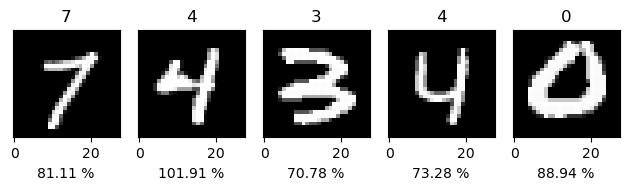

In [176]:
my_sample = x_test[np.random.choice(len(x_test), size = 5, replace = False)]
predictions = my_model(my_sample)
print(predictions)
percentages = [number * 100 for number in predictions]

fig, axs = plt.subplots(1,5)
for idx, element in enumerate(my_sample):
    image = np.array(element, dtype = 'float')
    pixels = image.reshape((28,28))
    axs[idx].imshow(pixels, cmap = 'gray')
    axs[idx].axes.get_yaxis().set_visible(False)
    axs[idx].set_title(f'{np.argmax(predictions[idx])}')
    axs[idx].set_xlabel(f'{max(percentages[idx]):.2f} %')
plt.tight_layout()
plt.show()

Let's create a function approximator instead of the classifier

In [79]:
N = 10000
epochs = 1

domain_min, domain_max = -3, 3

training_x = np.random.uniform(domain_min, domain_max, N).reshape(N,1)
training_y = np.random.uniform(domain_min, domain_max, N).reshape(N,1)
training_points = np.stack([training_x, training_y], axis = -1)
fitting_fun = lambda x, y: np.sin(1/np.sqrt(x + 4)) + np.cos(y**2)
training_z = fitting_fun(training_x, training_y)

plotting_points = 1000

test_x = np.random.uniform(domain_min, domain_max, plotting_points).reshape((plotting_points,1))
test_y = np.random.uniform(domain_min, domain_max, plotting_points).reshape((plotting_points,1))
testing_points = np.stack([test_x, test_y], axis = -1)
test_z = fitting_fun(test_x, test_y)


print(np.squeeze(training_points).shape, np.squeeze(testing_points).shape)

my_approximator = ELM(2, 512, 1)

for _ in range(epochs):
    my_approximator.fit(np.squeeze(training_points), training_z)
    train_loss, _ = my_approximator.evaluate(np.squeeze(training_points), training_z)
    print('train loss: %f' % train_loss)

    test_loss, _ = my_approximator.evaluate(np.squeeze(testing_points), test_z)
    print('val loss: %f' % test_loss)

(10000, 2) (1000, 2)
(10000, 512)
(10000, 1) (10000, 1)
train loss: 0.000001
(1000, 1) (1000, 1)
val loss: 0.000001


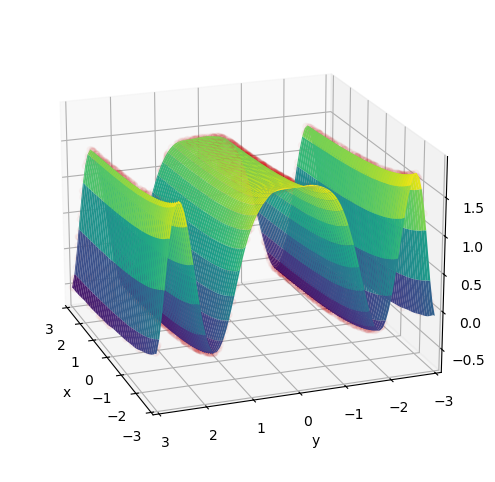

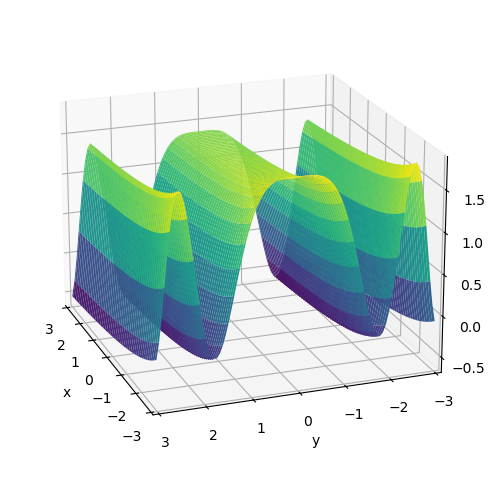

In [80]:
new_x = np.linspace(domain_min, domain_max, 100)
new_y = np.linspace(domain_min, domain_max, 100)
X,Y = np.meshgrid(new_x, new_y)

def plot2D_my_approx():
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X, Y, my_approximator(np.stack([X.flatten().reshape(-1,1), Y.flatten().reshape(-1,1)], axis = -1)).reshape((100, 100)),  cmap=cm.viridis)
    ax.scatter(training_x, training_y, training_z, color = 'tab:red', alpha = 2**(-0.0005*N))
    ax.set_xlim(domain_min, domain_max)
    ax.set_ylim(domain_min, domain_max)
    ax.view_init(20, 160)
    ax.set_xlabel('x')
    ax.set_ylabel('y')    
    
def plot2D_real():
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X, Y, fitting_fun(X.flatten().reshape(-1,1), Y.flatten().reshape(-1,1)).reshape((100, 100)),  cmap=cm.viridis)
    ax.set_xlim(domain_min, domain_max)
    ax.set_ylim(domain_min, domain_max)
    ax.view_init(20, 160)
    ax.set_xlabel('x')
    ax.set_ylabel('y')    
    
plot2D_my_approx()
plot2D_real()

plt.show()